Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Regresja liniowa

Pewien sposób wygenerowania listy (będziemy go wykorzystywać):

In [ ]:
print([1.]*5)
print([1.]*5+[3.]*10)
print([[1.,0.]]*2+[[0.,3.]]*4)

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[[1.0, 0.0], [1.0, 0.0], [0.0, 3.0], [0.0, 3.0], [0.0, 3.0], [0.0, 3.0]]


#Regresja logistyczna

## Przykład - mecz szachowy

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


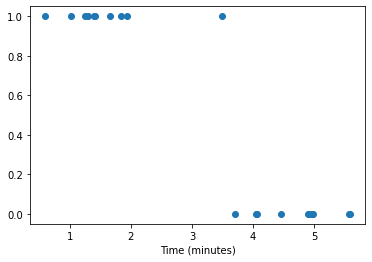

In [ ]:
times_label0 = np.random.normal(5, 1, 10)
times_label1 = np.random.normal(2, 1, 10)
times = np.append(times_label0, times_label1)

labels = np.array([0.]*len(times_label0)+[1.]*len(times_label1))

print(labels)

plt.scatter(times,labels)
plt.xlabel("Time (minutes)")
plt.show()

In [ ]:
times,labels

(array([3.70055084, 4.89819491, 5.58272593, 4.97818511, 4.9605163 ,
        5.56698646, 4.45642543, 4.91361023, 4.0566643 , 4.06107858,
        1.39323247, 0.59901089, 1.24878014, 1.84323098, 1.93494128,
        3.49544033, 1.41547339, 1.02686177, 1.29090502, 1.65236388]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

In [ ]:
model = Sequential()
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
epochs = 1000
h = model.fit(times,labels, verbose=0, epochs=epochs, batch_size=1000)

In [ ]:
Loss = h.history['loss']

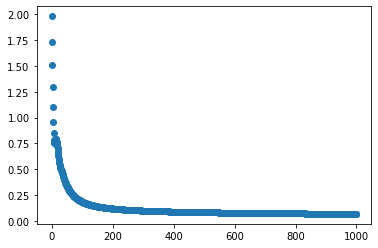

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdźmy jakie są **wartości wag**:

In [ ]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-3.676727]]
[12.65405]


In [ ]:
a = weights[0][0][0]
b = weights[1][0]
a,b

(-3.676727, 12.65405)

In [ ]:
max = np.max(times)
min = np.min(times)

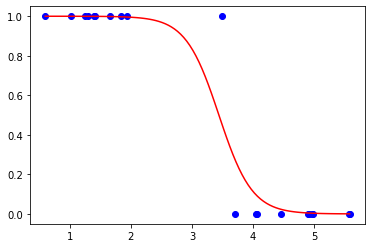

In [ ]:
X = np.linspace(min, max, num=100)
plt.plot(X,tf.sigmoid(a*X+b),c='r')
plt.scatter(times,labels,c="b")
plt.show()

##Przykład - 2 gangi

Zbiór danych:

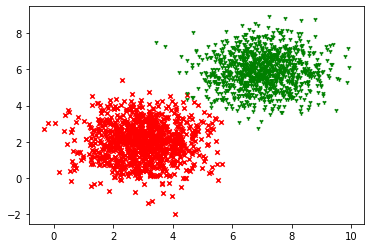

In [ ]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))

plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

Definiujemy model:

In [ ]:
model = Sequential()
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Ze współrzędnych **x** i **y** tworzymy **macierz o dwóch kolumnach** odpowiadających tym współrzędnym:

In [ ]:
xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
data_points = np.concatenate([xs,ys],axis=1)

In [ ]:
data_points

array([[2.91197391, 2.06863568],
       [2.63406672, 0.33740152],
       [3.76602049, 1.51126499],
       ...,
       [6.71572648, 5.42188587],
       [6.82909995, 5.40153592],
       [6.62644031, 5.58458234]])

Pętla ucząca:

In [ ]:
epochs = 1000
h = model.fit(data_points,labels, verbose=0, epochs=epochs, batch_size=1000)

In [ ]:
Loss = h.history['loss']

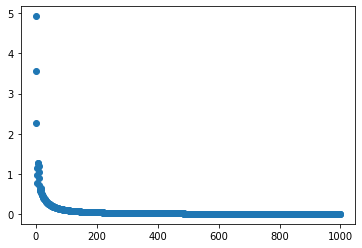

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzamy dla pewnego punktu:

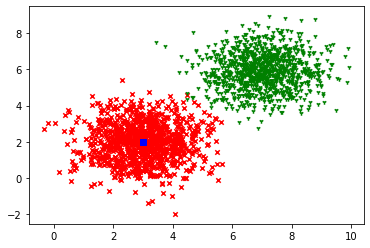

In [ ]:
x=3.0
y=2.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

In [ ]:
model.predict([[x,y]])

array([[0.00049254]], dtype=float32)

## Podział na **zbiory treningowy** i **walidacyjny**

In [ ]:
model = Sequential()
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Parametr **validation_split** określa jaka część zbioru danych będzie wykorzystana do **testów (walidacji)**

In [ ]:
epochs = 1000
h = model.fit(data_points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Zmiana błędu na danych treningowych i walidacyjnych:

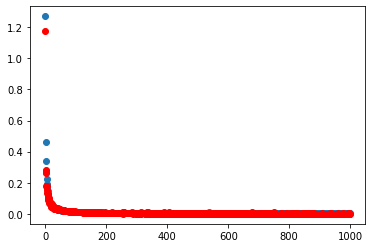

In [ ]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

# Regresja **softmax**

##Przykład - 3 gangi

Zbiór danych:

In [ ]:
x_label0 = np.random.normal(1, 1, (100, 1)) 
y_label0 = np.random.normal(1, 1, (100, 1)) 
x_label1 = np.random.normal(5, 1, (100, 1)) 
y_label1 = np.random.normal(4, 1, (100, 1)) 
x_label2 = np.random.normal(8, 1, (100, 1)) 
y_label2 = np.random.normal(0, 1, (100, 1)) 

In [ ]:
data_label0 = np.concatenate([x_label0, y_label0],axis=1) 
data_label1 = np.concatenate([x_label1, y_label1],axis=1)  
data_label2 = np.concatenate([x_label2, y_label2],axis=1)   
points = np.concatenate([data_label0, data_label1, data_label2],axis=0) 

Kodowanie one-hot

In [ ]:
labels = np.array([[1., 0., 0.]] * len(data_label0) + [[0., 1., 0.]] * len(data_label1) + [[0.,0., 1.]] * len(data_label2))

In [ ]:
points.shape,labels.shape

((300, 2), (300, 3))

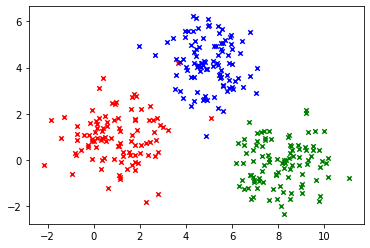

In [ ]:
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.show()

In [ ]:
arr = np.arange(points.shape[0])
np.random.shuffle(arr)

points = points[arr, :]
labels = labels[arr, :]

Definiujemy model:

In [ ]:
model = Sequential()
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Pętla ucząca:

In [ ]:
epochs = 1000
h = model.fit(points,labels, verbose=1, validation_split=0.2, epochs=epochs, batch_size=20)

Epoch 1/1000
12/12 [==============================] - 0s 22ms/step - loss: 0.7568 - accuracy: 0.5179 - val_loss: 0.2762 - val_accuracy: 0.8667
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.8577 - val_loss: 0.2240 - val_accuracy: 0.8667
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1948 - accuracy: 0.8992 - val_loss: 0.1762 - val_accuracy: 0.9833
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1647 - accuracy: 0.9683 - val_loss: 0.1352 - val_accuracy: 0.9833
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.9686 - val_loss: 0.1224 - val_accuracy: 0.9833
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1333 - accuracy: 0.9676 - val_loss: 0.0982 - val_accuracy: 0.9833
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9830 - val_loss: 0.0976 - val_accuracy: 1.0000
Epoch

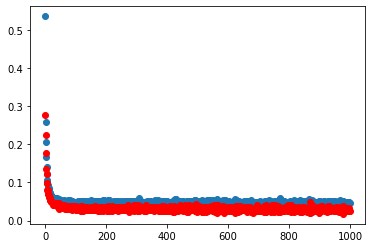

In [ ]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

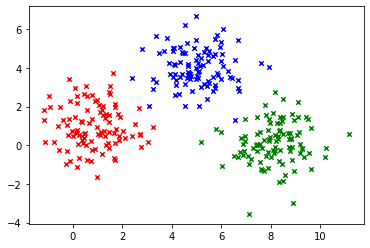

In [ ]:
model.predict([[5,5]])

array([[2.5591675e-07, 9.9999976e-01, 1.6428512e-22]], dtype=float32)

# Zadania

**zad.1**

In [3]:
x_label1 = np.random.normal(3, 1, (400, 1))
y_label1 = np.random.normal(2, 1, (400, 1))
x_label2 = np.random.normal(7, 1, (400, 1))
y_label2 = np.random.normal(6, 1, (400, 1))

data_label1 = np.concatenate([x_label1, y_label1],axis=1)  
data_label2 = np.concatenate([x_label2, y_label2],axis=1) 
points = np.concatenate([data_label1, data_label2], axis=0) 

In [4]:
# Kodowanie one-hot
labels = np.array([[0.,]] * len(data_label1) + [[1.]] * len(data_label2))

print(points.shape, labels.shape)

(800, 2) (800, 1)


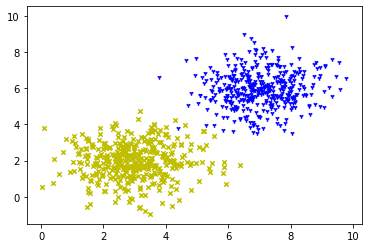

In [5]:
plt.scatter(x_label1, y_label1, c='y', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='b', marker='1', s=20)
plt.show()

In [6]:
arr = np.arange(points.shape[0])
np.random.shuffle(arr)
points = points[arr, :]
labels = labels[arr, :]

In [7]:
model = Sequential()
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs = 800
h = model.fit(points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

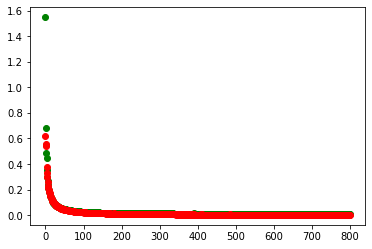

In [9]:
plt.scatter(np.arange(epochs), h.history['loss'],c = 'g')
plt.scatter(np.arange(epochs), h.history['val_loss'],c = 'r')
plt.show()

In [10]:
model.predict([[6, 4]])

array([[1.]], dtype=float32)

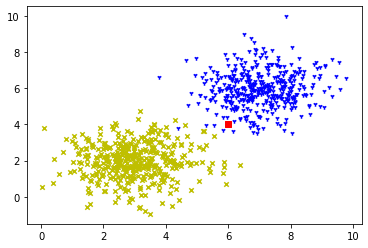

In [11]:
x=6.0
y=4.0 
plt.scatter(x_label1, y_label1, c='y', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='b', marker='1', s=20)
plt.scatter([x],[y],c='r', marker='s')
plt.show()

inne parametry:

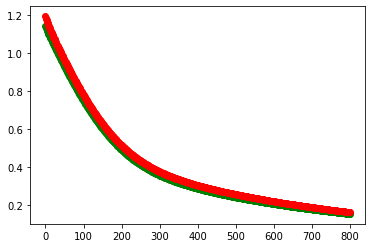

In [16]:
# keras Adam 0.001
model = Sequential()
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

epochs = 800
h = model.fit(points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

plt.scatter(np.arange(epochs), h.history['loss'],c = 'g')
plt.scatter(np.arange(epochs), h.history['val_loss'],c = 'r')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


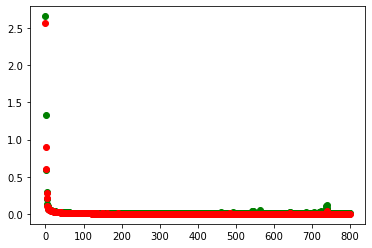

In [15]:
# keras Adam 0.5
model = Sequential()
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])
epochs = 800
h = model.fit(points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

plt.scatter(np.arange(epochs), h.history['loss'],c = 'g')
plt.scatter(np.arange(epochs), h.history['val_loss'],c = 'r')
plt.show()

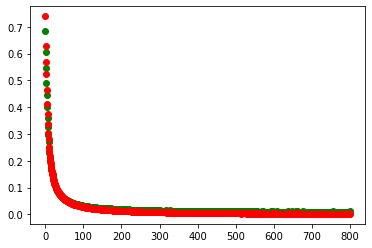

In [18]:
# keras Adam 0.05
model = Sequential()
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "softmax"))

opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])
epochs = 800
h = model.fit(points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

plt.scatter(np.arange(epochs), h.history['loss'],c = 'g')
plt.scatter(np.arange(epochs), h.history['val_loss'],c = 'r')
plt.show()

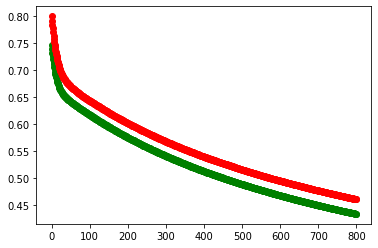

In [19]:
# keras SGD 0.001
model = Sequential()
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "softmax"))

opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

epochs = 800
h = model.fit(points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

plt.scatter(np.arange(epochs), h.history['loss'],c = 'g')
plt.scatter(np.arange(epochs), h.history['val_loss'],c = 'r')
plt.show()

In [20]:
model.predict([[6, 4]])

array([[1.]], dtype=float32)

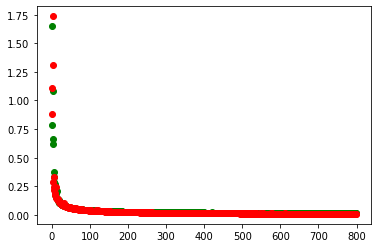

In [21]:
# keras SGD 0.5
model = Sequential()
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "softmax"))

opt = keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

epochs = 800
h = model.fit(points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=100)

plt.scatter(np.arange(epochs), h.history['loss'],c = 'g')
plt.scatter(np.arange(epochs), h.history['val_loss'],c = 'r')
plt.show()